#Task 1:
This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Column description:
1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
3.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
4.  `LunchType`: School lunch type (standard or free/reduced)
5.  `TestPrep`: Test preparation course followed (completed or none)
6.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
7.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
8.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
9.  `NrSiblings`: Number of siblings the student has (0 to 7)
10. `TransportMeans`: Means of transport to school (schoolbus/private)
11. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
12. `MathScore`: math test score(0-100)
13. `ReadingScore`: reading test score(0-100)
13. `WritingScore`: writing test score(0-100)

#Download the dataset
Run the cell below

In [ ]:
!gdown 1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2

Downloading...
From: https://drive.google.com/uc?id=1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2
To: /content/Expanded_data_with_more_features.csv
100% 2.91M/2.91M [00:00<00:00, 143MB/s]


#Read the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/Expanded_data_with_more_features.csv')

In [ ]:
data.head(3)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [ ]:
data.shape  # 15 koloni, 1 output, 1 ID sho ke se dropne, 13 input

(30641, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


#Visualization

<Axes: >

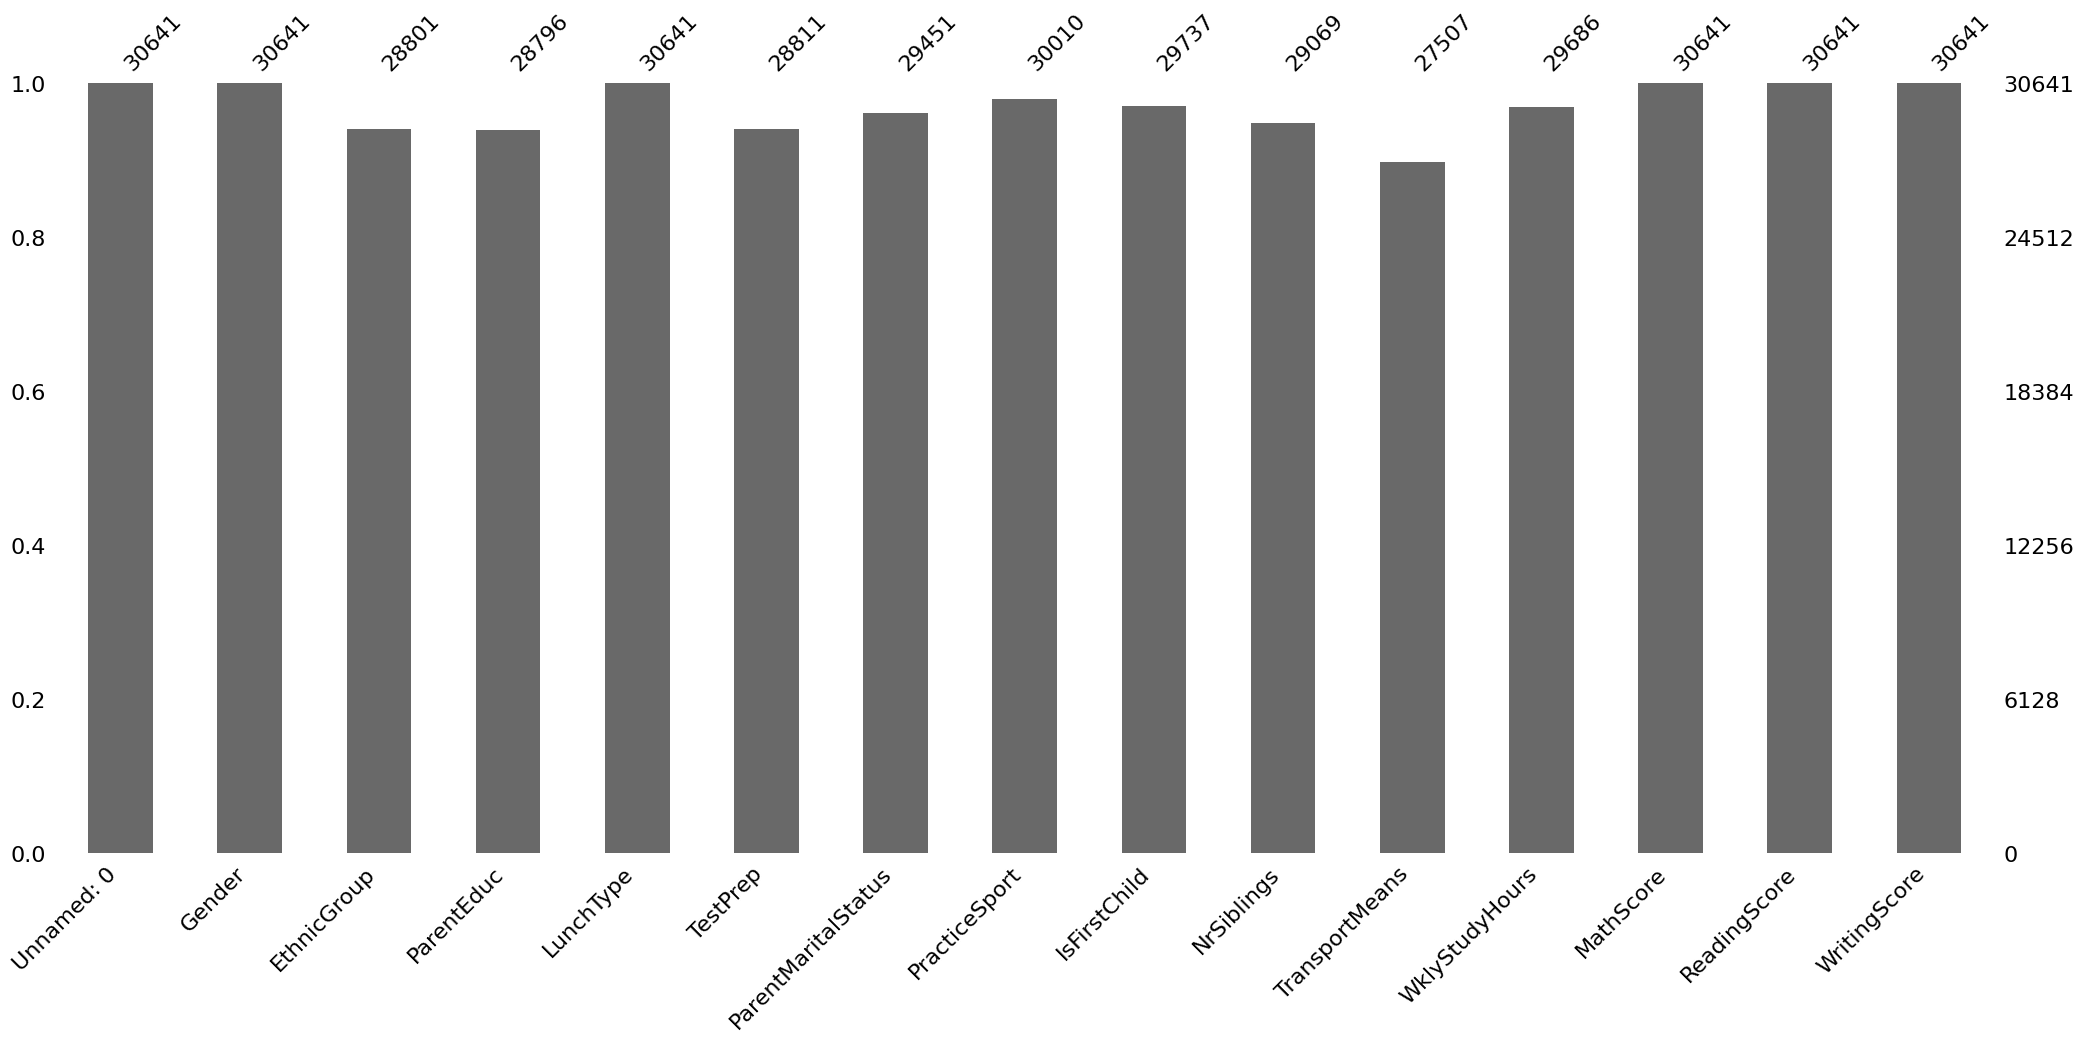

In [ ]:
msno.bar(data)  # 9 koloni

In [ ]:
import plotly.express as px
grouped = data[['Gender', 'LunchType']].groupby('LunchType').value_counts().reset_index()
px.bar(
    grouped,
    x='LunchType',
    y=0,
    color = "Gender",
    barmode='group',
    title='Lunch',
    width=800,
    height=700
)  # nema znachitelna razlika
# grouped

<Axes: xlabel='ParentEduc'>

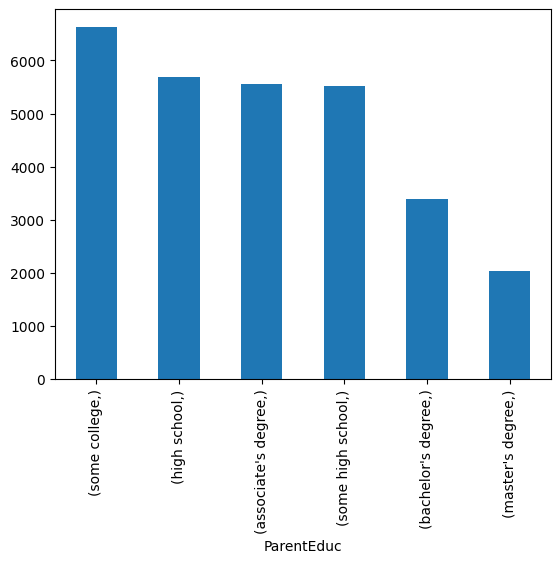

In [ ]:
data[['ParentEduc']].value_counts().plot.bar() # kategoriska

In [ ]:
data[['ParentEduc']].values

array([["bachelor's degree"],
       ['some college'],
       ["master's degree"],
       ...,
       ['high school'],
       ["associate's degree"],
       ['some college']], dtype=object)

In [ ]:
# def parent_encoder(string: str) -> int:
#   if string == "bachelor's degree":
#     pass
#   if string == "some college":
#     pass
#   if string ==


<Axes: >

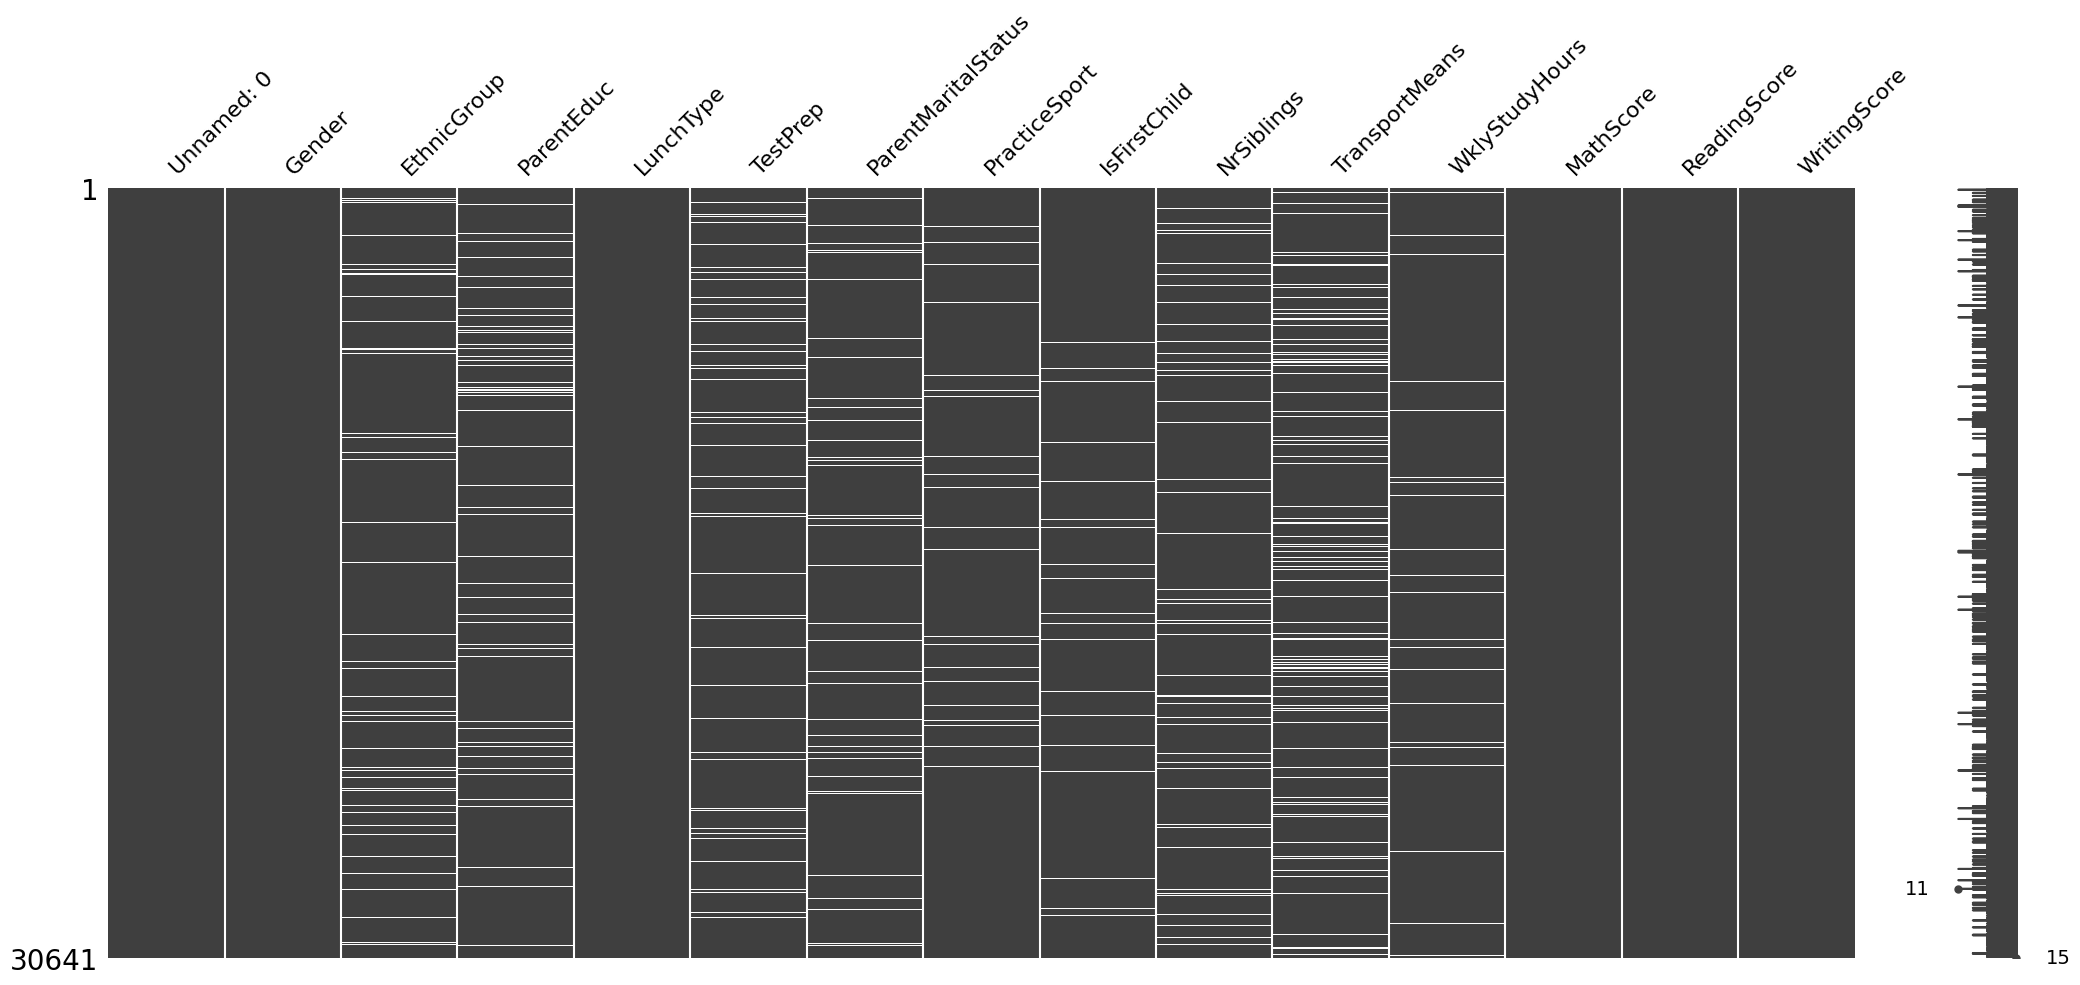

In [ ]:
msno.matrix(data)

#Missing Values & Textual data

In [ ]:
data[['WklyStudyHours']].groupby('WklyStudyHours').size()

WklyStudyHours
5 - 10    16246
< 5        8238
> 10       5202
dtype: int64

In [ ]:
data.dropna(subset=['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours'], inplace=True)  # no time to impute

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 2 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           19243 non-null  int64  
 1   Gender               19243 non-null  object 
 2   EthnicGroup          19243 non-null  object 
 3   ParentEduc           19243 non-null  object 
 4   LunchType            19243 non-null  object 
 5   TestPrep             19243 non-null  object 
 6   ParentMaritalStatus  19243 non-null  object 
 7   PracticeSport        19243 non-null  object 
 8   IsFirstChild         19243 non-null  object 
 9   NrSiblings           19243 non-null  float64
 10  TransportMeans       19243 non-null  object 
 11  WklyStudyHours       19243 non-null  object 
 12  MathScore            19243 non-null  int64  
 13  ReadingScore         19243 non-null  int64  
 14  WritingScore         19243 non-null  int64  
dtypes: float64(1), int64(4), object(10)


#Train - test split of the dataset (80:20 ratio)

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in ['Gender', 'EthnicGroup', 'LunchType', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']:
  data[column] = encoder.fit_transform(data[column])
# for columns in ['Gender'] here we need to encode all categorical labels, encoder.fit_transform on all columns

In [ ]:
X, Y = data.drop(columns='WklyStudyHours'), data['WklyStudyHours']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               19243 non-null  int64  
 1   EthnicGroup          19243 non-null  int64  
 2   ParentEduc           19243 non-null  int64  
 3   LunchType            19243 non-null  int64  
 4   TestPrep             19243 non-null  int64  
 5   ParentMaritalStatus  19243 non-null  int64  
 6   PracticeSport        19243 non-null  int64  
 7   IsFirstChild         19243 non-null  int64  
 8   NrSiblings           19243 non-null  float64
 9   TransportMeans       19243 non-null  int64  
 10  WklyStudyHours       19243 non-null  int64  
 11  MathScore            19243 non-null  int64  
 12  ReadingScore         19243 non-null  int64  
 13  WritingScore         19243 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.2 MB


#Model training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(5)
model.fit(X_train, Y_train)  # error because they are not encoded
preds = model.predict(X_test)

#Model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score # no time aaaa
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.55      0.79      0.65      2103
           1       0.32      0.20      0.25      1105
           2       0.21      0.05      0.08       641

    accuracy                           0.50      3849
   macro avg       0.36      0.35      0.33      3849
weighted avg       0.43      0.50      0.44      3849

